In [30]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
gene_exp_df = pd.read_table('data/trunc_combined_rna_data.tsv', header=0, index_col=0)

### We want to test the batching of the data we're using in particular for classification, therefore using the split of patients that was defined in combine_hiseq_ga_rna

In [7]:
hiseq_patient_list = []
with open('data/illumina_hiseq_patients.tsv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter='\t',)
    for row in csvreader:
        hiseq_patient_list += row

In [8]:
ga_patient_list = []
with open('data/illumina_ga_patients.tsv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter='\t',)
    for row in csvreader:
        ga_patient_list += row

In [11]:
print(len(hiseq_patient_list))
print(len(ga_patient_list))

359
263


In [18]:
data_logged = gene_exp_df.copy()
data_logged = np.log(data_logged)
data_logged.replace([np.inf, -np.inf], np.nan, inplace=True)

In [22]:
### Replace all NaNs with lowest possible values in matrix
a = list(data_logged.min())
lowest_possible_exp_value = math.floor(min(a))
# We want to replace all NaNs with a very small value.
# The smallest value is almost -5, therefore we can replace all NaNs with -5
# to ensure that an NaN represents the floor of the range.
data_logged.replace(np.nan, lowest_possible_exp_value, inplace=True)

In [25]:
pca = PCA()

In [26]:
reduced_data = pca.fit_transform(data_logged)

In [27]:
len(reduced_data)

20530

In [39]:
def plot_pca_components(x_axis_pc, y_axis_pc):
    plt.figure(figsize=(10,6))
    
    for i, name in enumerate(data_logged.columns.tolist()):
        color = 'blue'
        if name in hiseq_patient_list:
            color = 'red'
        plt.scatter(reduced_data[i,x_axis_pc], reduced_data[i,y_axis_pc],c=color)
        
    plt.axvline()
    plt.axhline()
    plt.xlabel('PC'+str(x_axis_pc+1)+ ' (%.3f variance explained)'%pca.explained_variance_ratio_[x_axis_pc])
    plt.ylabel('PC'+str(y_axis_pc+1)+ ' (%.3f variance explained)'%pca.explained_variance_ratio_[y_axis_pc])

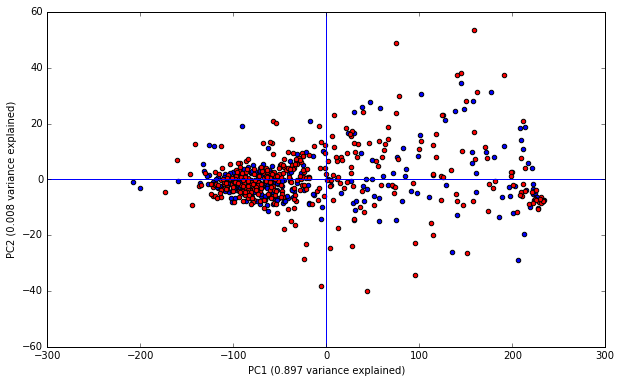

In [40]:
plot_pca_components(0, 1)

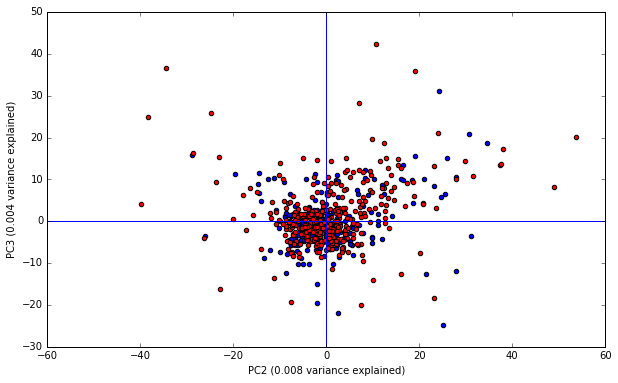

In [41]:
plot_pca_components(1, 2)

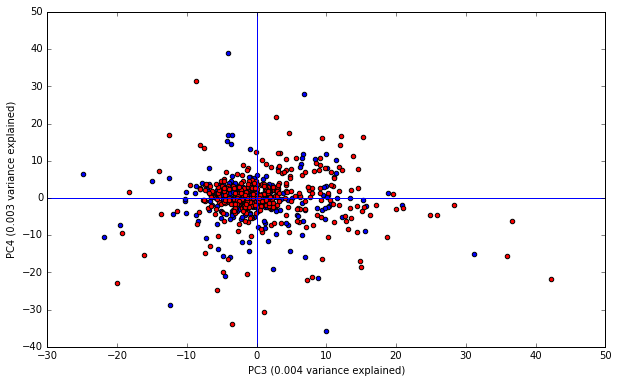

In [42]:
plot_pca_components(2, 3)